In [62]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import itertools

Notes:
1. OOV - num token(s)
2. Align vocabularies language-wise


In [63]:
# Meta statistics
sl_set = []
OOV_count_set = []
vocab_count_set = []
sl_stats_set = []

In [64]:
# start = time.perf_counter()
print("Monolingual English")
bow = []
sentence_length = []
vocab_alpha = {}
OOV = {}
with open('unaligned.en', "r") as text_file:
    for line in text_file:
        stripped_line = line.strip()
        bow.extend(stripped_line.split())
        sentence_length.append(len(stripped_line.split()))

# Word Count + Dictionary    
print("Word Count Total: ", sum(sentence_length))
vocab = pd.DataFrame(list(zip(bow, bow, [1] * len(bow))), columns =['Word', 'Token','Count']).groupby('Word',sort=False)['Token'].count().to_dict()
for word, count in vocab.items():
    if any(c.isalpha() for c in word):
        vocab_alpha[word] = count
    else:
        OOV[word] = count
print("Total Vocab Size by Words: ", len(vocab))
print("OOV Size: ", len(OOV))
print("Net Vocab Size: ", len(vocab_alpha))

# Word Frequency
wf = np.asarray(list(vocab_alpha.values()))
wf_metrics = {"min": np.amin(wf), "max": np.amax(wf), "mean": np.mean(wf), "std": np.std(wf)}
print("Word Frequency Info: ", wf_metrics)

# Most Frequent Words
sorted_vocab = dict(sorted(vocab_alpha.items(), key=operator.itemgetter(1),reverse=True))
top = dict(itertools.islice(sorted_vocab.items(), 20))
print("Most Common Words: ", top)

# Sentence Lengths
sl = np.asarray(sentence_length)
sentence_len_metrics = {"min": np.amin(sl), "max": np.amax(sl), "mean": np.mean(sl), "std": np.std(sl)}
print("Sentence Length Info: ",sentence_len_metrics)

# Append to metadata
sl_set.append(sl)
OOV_count_set.append(len(OOV))
vocab_count_set.append(len(vocab_alpha))

Monolingual English
Word Count Total:  8820344
Total Vocab Size by Words:  60008
OOV Size:  2715
Net Vocab Size:  57293
Word Frequency Info:  {'min': 1, 'max': 585841, 'mean': 151.36370935367322, 'std': 3697.307529119359}
Most Common Words:  {'the': 585841, 'to': 279419, 'of': 275207, 'and': 226316, 'in': 190930, 'a': 163817, 'is': 154142, 'that': 153805, 'i': 110767, 'we': 99798, 'it': 96337, 'this': 95373, 'for': 90647, 'on': 73403, 'be': 73055, 'are': 65558, 'not': 63753, 'have': 62332, 'as': 54355, 'with': 52884}
Sentence Length Info:  {'min': 1, 'max': 180, 'mean': 18.608320675105485, 'std': 9.763772743797661}


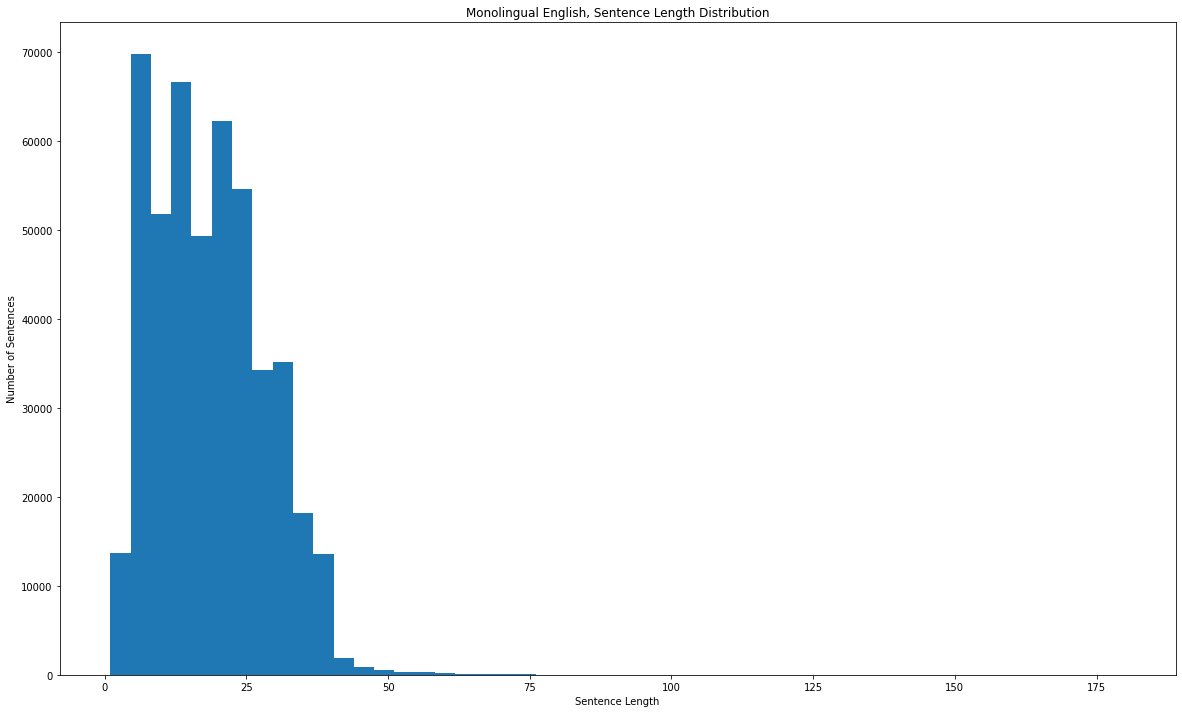

In [65]:
plt.figure(figsize=[20,12])
plt.hist(sl, bins=50)
plt.title("Monolingual English, Sentence Length Distribution")
plt.ylabel('Number of Sentences',fontsize=10)
plt.xlabel('Sentence Length',fontsize=10)
plt.show()

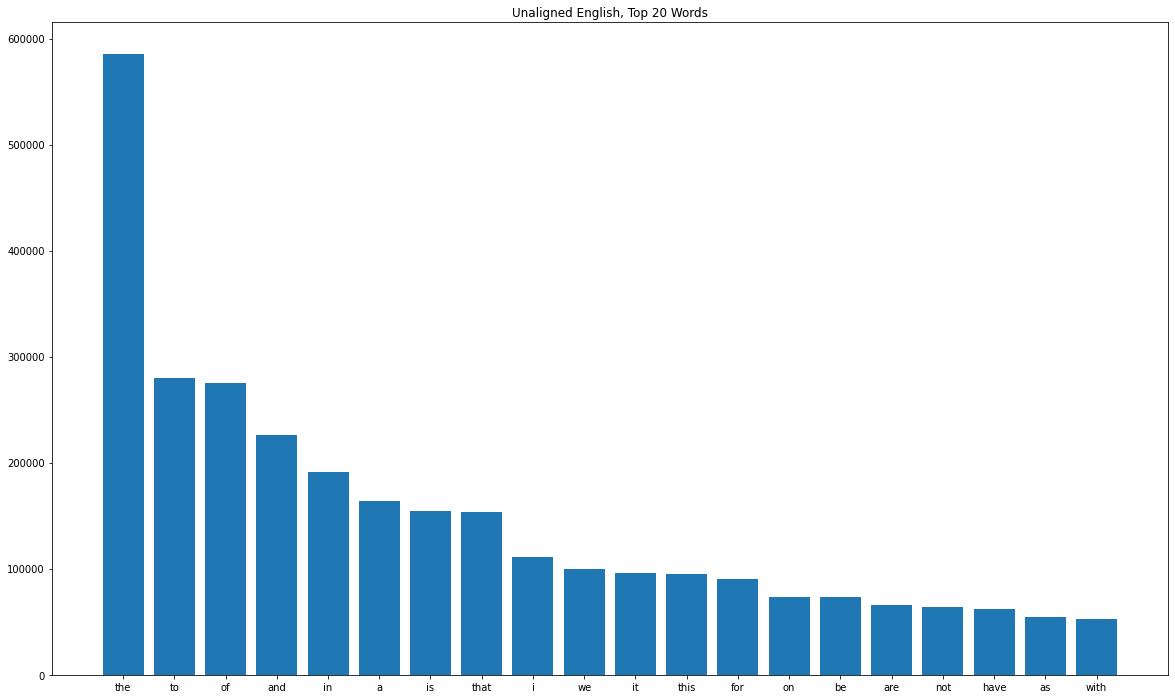

In [66]:
plt.figure(figsize=[20,12])
plt.bar(top.keys(), top.values())
plt.title("Unaligned English, Top 20 Words")
plt.show()

In [67]:
print("Monolingual French")
bow = []
sentence_length = []
vocab_alpha = {}
OOV = {}
with open('unaligned.fr', "r") as text_file:
    for line in text_file:
        stripped_line = line.strip()
        bow.extend(stripped_line.split())
        sentence_length.append(len(stripped_line.split()))

# Word Count + Dictionary    
print("Word Count Total: ", sum(sentence_length))
vocab = pd.DataFrame(list(zip(bow, bow, [1] * len(bow))), columns =['Word', 'Token','Count']).groupby('Word',sort=False)['Token'].count().to_dict()
for word, count in vocab.items():
    if any(c.isalpha() for c in word):
        vocab_alpha[word] = count
    else:
        OOV[word] = count
print("Total Vocab Size by Words: ", len(vocab))
print("OOV Size: ", len(OOV))
print("Net Vocab Size: ", len(vocab_alpha))

# Word Frequency
wf = np.asarray(list(vocab_alpha.values()))
wf_metrics = {"min": np.amin(wf), "max": np.amax(wf), "mean": np.mean(wf), "std": np.std(wf)}
print("Word Frequency Info: ", wf_metrics)

# Most Frequent Words
sorted_vocab = dict(sorted(vocab_alpha.items(), key=operator.itemgetter(1),reverse=True))
top = dict(itertools.islice(sorted_vocab.items(), 20))
print("Most Common Words: ", top)

# Sentence Lengths
sl = np.asarray(sentence_length)
sentence_len_metrics = {"min": np.amin(sl), "max": np.amax(sl), "mean": np.mean(sl), "std": np.std(sl)}
print("Sentence Length Info: ",sentence_len_metrics)

# Append to metadata
sl_set.append(sl)
OOV_count_set.append(len(OOV))
vocab_count_set.append(len(vocab_alpha))

Monolingual French
Word Count Total:  9746232
Total Vocab Size by Words:  83314
OOV Size:  2545
Net Vocab Size:  80769
Word Frequency Info:  {'min': 1, 'max': 462046, 'mean': 118.78731939234112, 'std': 3017.9261930933653}
Most Common Words:  {'de': 462046, 'la': 298409, 'et': 211018, 'le': 209347, 'les': 197208, 'à': 185613, "l'": 171036, 'des': 163300, 'que': 147798, 'en': 135833, 'est': 129170, "d'": 112012, 'nous': 105249, 'un': 104499, 'une': 103733, 'il': 90968, 'pour': 84890, 'du': 84231, 'dans': 83626, 'je': 79725}
Sentence Length Info:  {'min': 1, 'max': 224, 'mean': 20.561670886075948, 'std': 10.823182771689924}


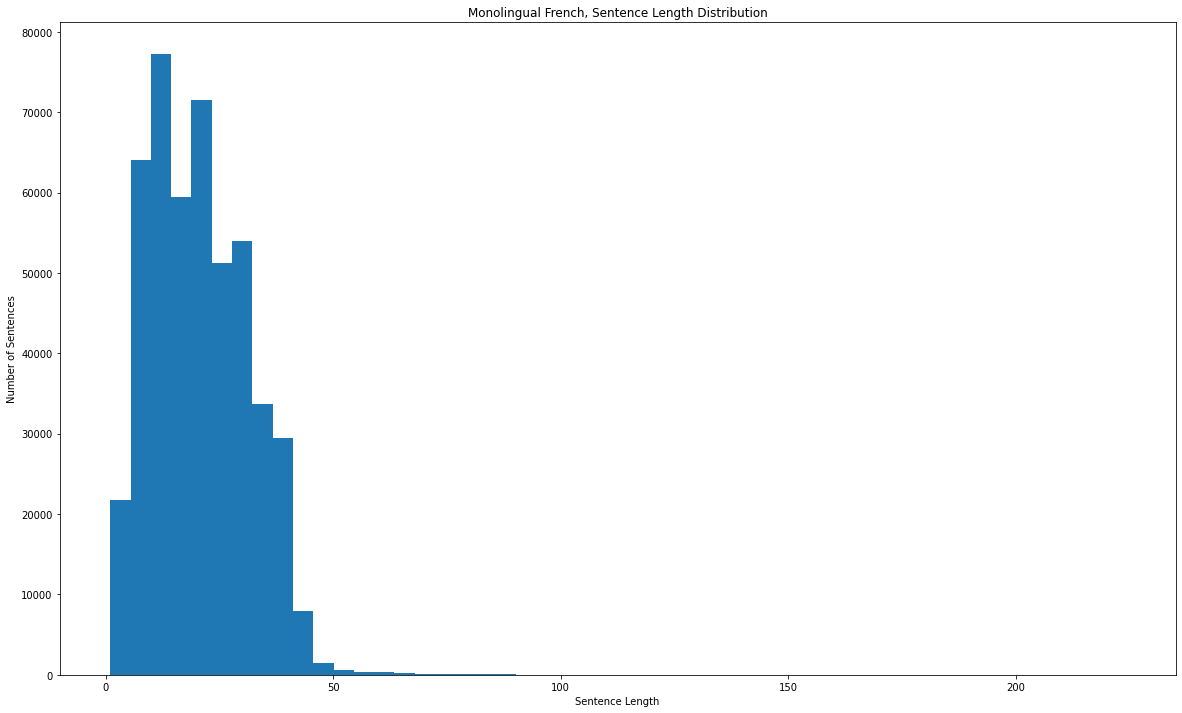

In [68]:
plt.figure(figsize=[20,12])
plt.hist(sl, bins=50)
plt.title("Monolingual French, Sentence Length Distribution")
plt.ylabel('Number of Sentences',fontsize=10)
plt.xlabel('Sentence Length',fontsize=10)
plt.show()

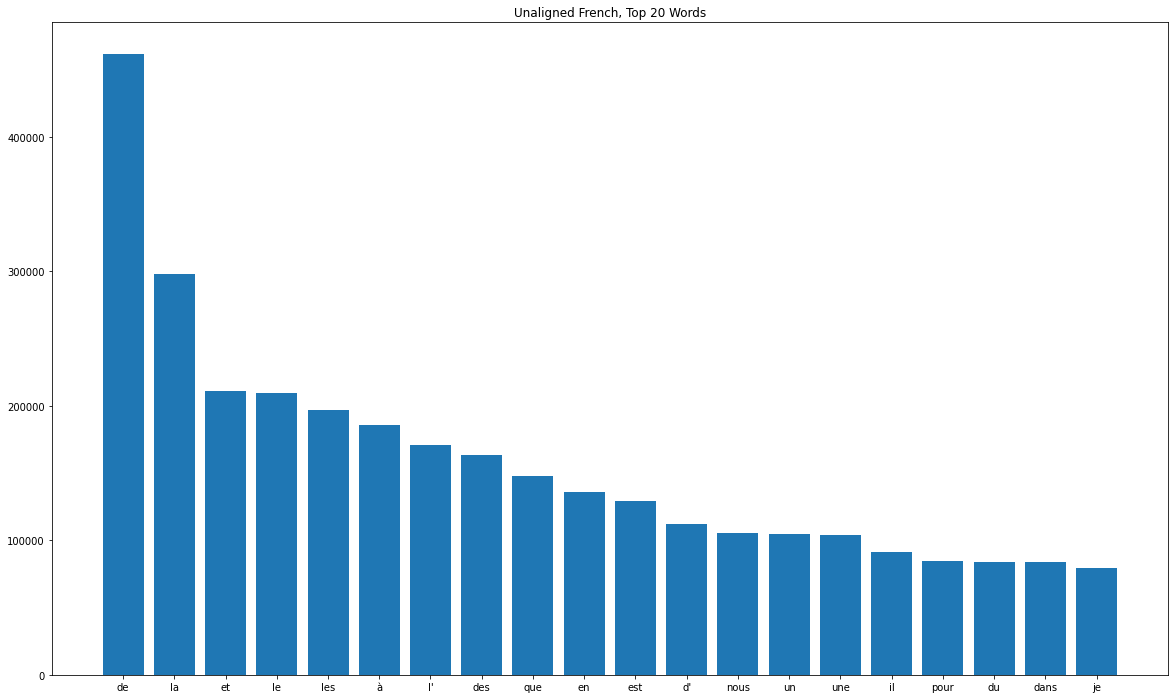

In [69]:
plt.figure(figsize=[20,12])
plt.bar(top.keys(), top.values())
plt.title("Unaligned French, Top 20 Words")
plt.show()

In [70]:
print("Parallel English")
bow = []
sentence_length = []
vocab_alpha = {}
OOV = {}
with open('train.lang1', "r") as text_file:
    for line in text_file:
        stripped_line = line.strip()
        bow.extend(stripped_line.split())
        sentence_length.append(len(stripped_line.split()))

# Word Count + Dictionary    
print("Word Count Total: ", sum(sentence_length))
vocab = pd.DataFrame(list(zip(bow, bow, [1] * len(bow))), columns =['Word', 'Token','Count']).groupby('Word',sort=False)['Token'].count().to_dict()
for word, count in vocab.items():
    if any(c.isalpha() for c in word):
        vocab_alpha[word] = count
    else:
        OOV[word] = count
print("Total Vocab Size by Words: ", len(vocab))
print("OOV Size: ", len(OOV))
print("Net Vocab Size: ", len(vocab_alpha))

# Word Frequency
wf = np.asarray(list(vocab_alpha.values()))
wf_metrics = {"min": np.amin(wf), "max": np.amax(wf), "mean": np.mean(wf), "std": np.std(wf)}
print("Word Frequency Info: ", wf_metrics)

# Most Frequent Words
sorted_vocab = dict(sorted(vocab_alpha.items(), key=operator.itemgetter(1),reverse=True))
top = dict(itertools.islice(sorted_vocab.items(), 20))
print("Most Common Words: ", top)

# Sentence Lengths
sl = np.asarray(sentence_length)
sentence_len_metrics = {"min": np.amin(sl), "max": np.amax(sl), "mean": np.mean(sl), "std": np.std(sl)}
print("Sentence Length Info: ", sentence_len_metrics)

# Append to metadata
sl_set.append(sl)
OOV_count_set.append(len(OOV))
vocab_count_set.append(len(vocab_alpha))

Parallel English
Word Count Total:  205361
Total Vocab Size by Words:  13657
OOV Size:  341
Net Vocab Size:  13316
Word Frequency Info:  {'min': 1, 'max': 13787, 'mean': 15.155752478221688, 'std': 178.616138871287}
Most Common Words:  {'the': 13787, 'of': 6452, 'to': 6432, 'and': 5259, 'in': 4384, 'a': 3805, 'is': 3617, 'that': 3573, 'i': 2650, 'it': 2287, 'we': 2165, 'this': 2164, 'for': 2125, 'on': 1739, 'be': 1631, 'are': 1592, 'not': 1475, 'have': 1416, 'you': 1220, 'with': 1215}
Sentence Length Info:  {'min': 1, 'max': 95, 'mean': 18.66918181818182, 'std': 9.860615657694012}


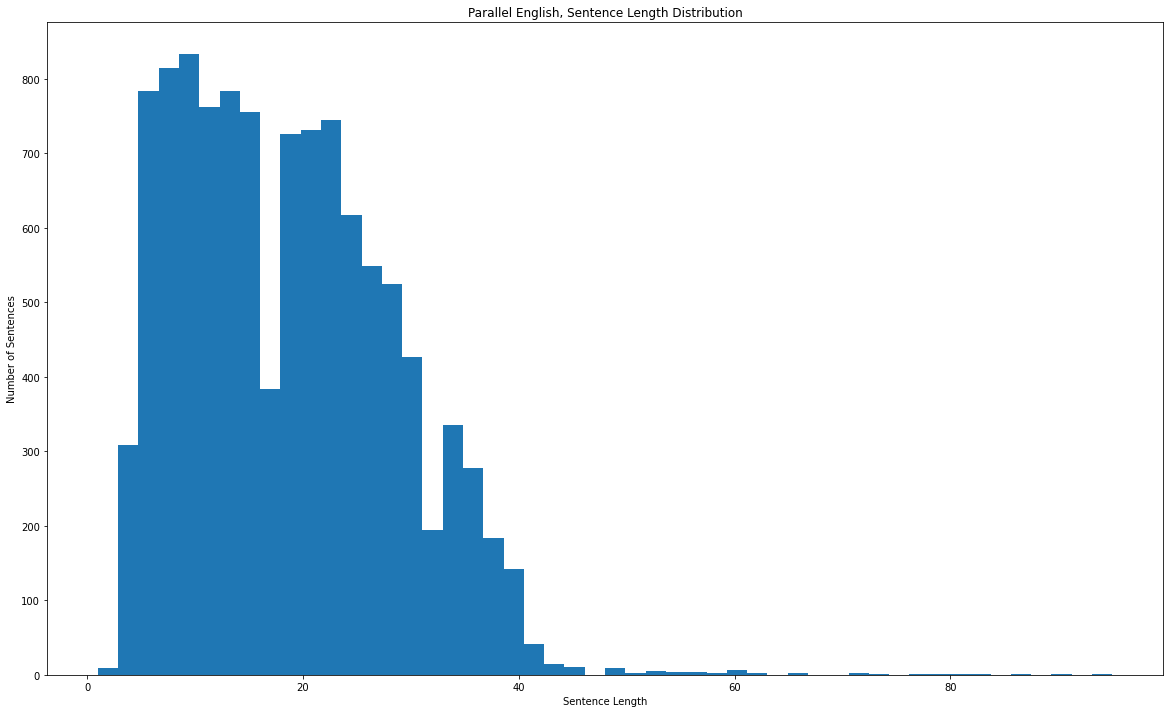

In [71]:
plt.figure(figsize=[20,12])
plt.hist(sl, bins=50)
plt.title("Parallel English, Sentence Length Distribution")
plt.ylabel('Number of Sentences',fontsize=10)
plt.xlabel('Sentence Length',fontsize=10)
plt.show()

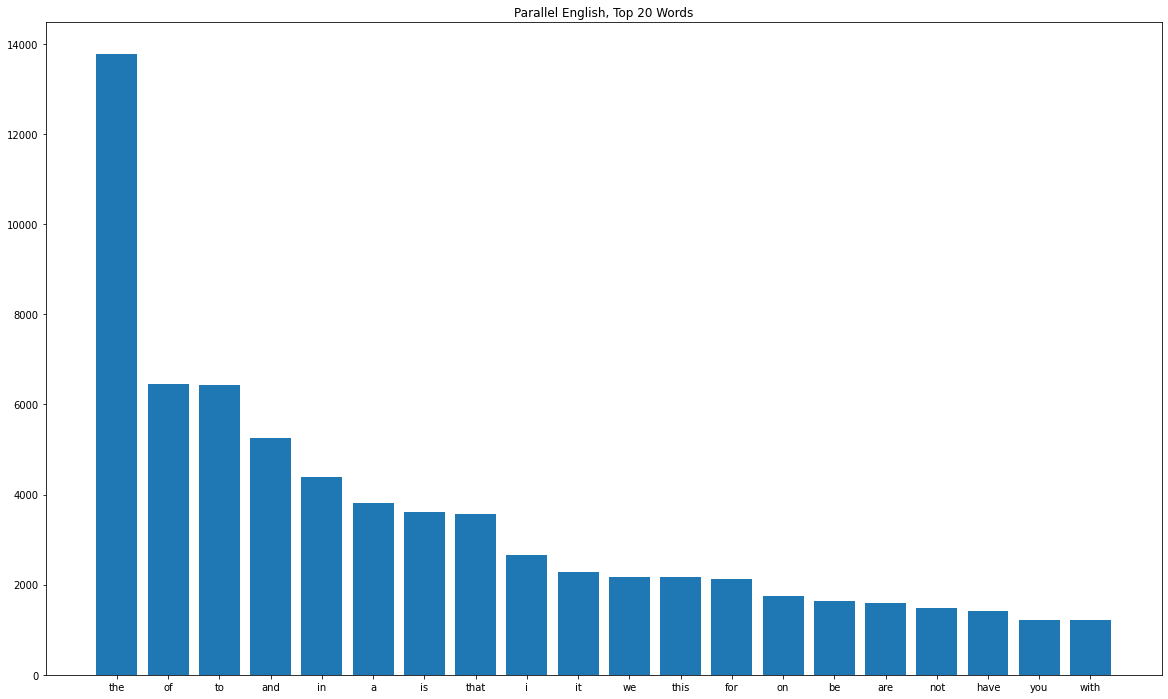

In [72]:
plt.figure(figsize=[20,12])
plt.bar(top.keys(), top.values())
plt.title("Parallel English, Top 20 Words")
plt.show()

In [73]:
print("Parallel French")
bow = []
sentence_length = []
vocab_alpha = {}
OOV = {}
with open('train.lang2', "r") as text_file:
    for line in text_file:
        stripped_line = line.strip()
        bow.extend(stripped_line.split())
        sentence_length.append(len(stripped_line.split()))

# Word Count + Dictionary    
print("Word Count Total: ", sum(sentence_length))
vocab = pd.DataFrame(list(zip(bow, bow, [1] * len(bow))), columns =['Word', 'Token','Count']).groupby('Word',sort=False)['Token'].count().to_dict()
for word, count in vocab.items():
    if any(c.isalpha() for c in word):
        vocab_alpha[word] = count
    else:
        OOV[word] = count
print("Total Vocab Size by Words: ", len(vocab))
print("OOV Size: ", len(OOV))
print("Net Vocab Size: ", len(vocab_alpha))

# Word Frequency
wf = np.asarray(list(vocab_alpha.values()))
wf_metrics = {"min": np.amin(wf), "max": np.amax(wf), "mean": np.mean(wf), "std": np.std(wf)}
print("Word Frequency Info: ", wf_metrics)

# Most Frequent Words
sorted_vocab = dict(sorted(vocab_alpha.items(), key=operator.itemgetter(1),reverse=True))
top = dict(itertools.islice(sorted_vocab.items(), 20))
print("Most Common Words: ", top)

# Sentence Lengths
sl = np.asarray(sentence_length)
sentence_len_metrics = {"min": np.amin(sl), "max": np.amax(sl), "mean": np.mean(sl), "std": np.std(sl)}
print("Sentence Length Info: ",sentence_len_metrics)

# Append to metadata
sl_set.append(sl)
OOV_count_set.append(len(OOV))
vocab_count_set.append(len(vocab_alpha))

Parallel French
Word Count Total:  227856
Total Vocab Size by Words:  18222
OOV Size:  327
Net Vocab Size:  17895
Word Frequency Info:  {'min': 1, 'max': 10548, 'mean': 12.521039396479464, 'std': 141.36399443666133}
Most Common Words:  {'de': 10548, 'la': 6400, 'et': 4612, 'le': 4525, 'à': 4335, 'les': 3982, 'des': 3675, "l'": 3625, 'que': 3431, 'est': 3032, 'en': 2909, "d'": 2567, 'un': 2361, 'une': 2339, 'du': 2008, 'pour': 1857, 'a': 1732, 'qui': 1728, 'nous': 1727, 'pas': 1703}
Sentence Length Info:  {'min': 1, 'max': 105, 'mean': 20.714181818181817, 'std': 10.912683977982034}


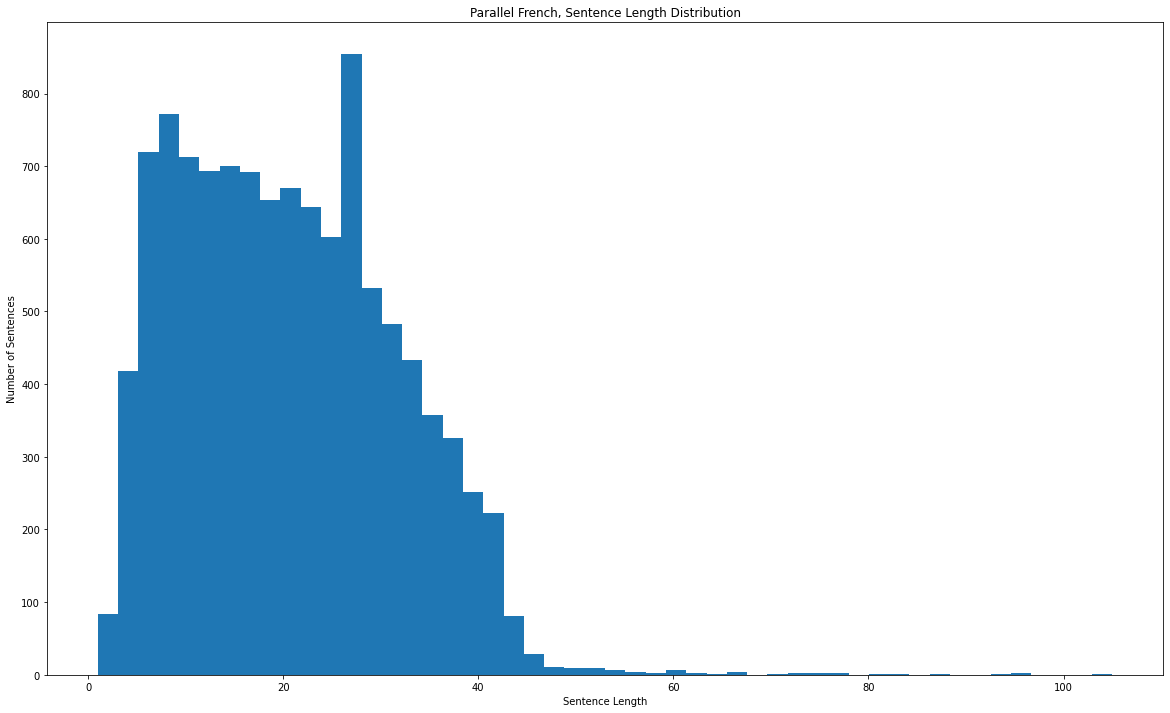

In [74]:
plt.figure(figsize=[20,12])
plt.hist(sl, bins=50)
plt.title("Parallel French, Sentence Length Distribution")
plt.ylabel('Number of Sentences',fontsize=10)
plt.xlabel('Sentence Length',fontsize=10)
plt.show()

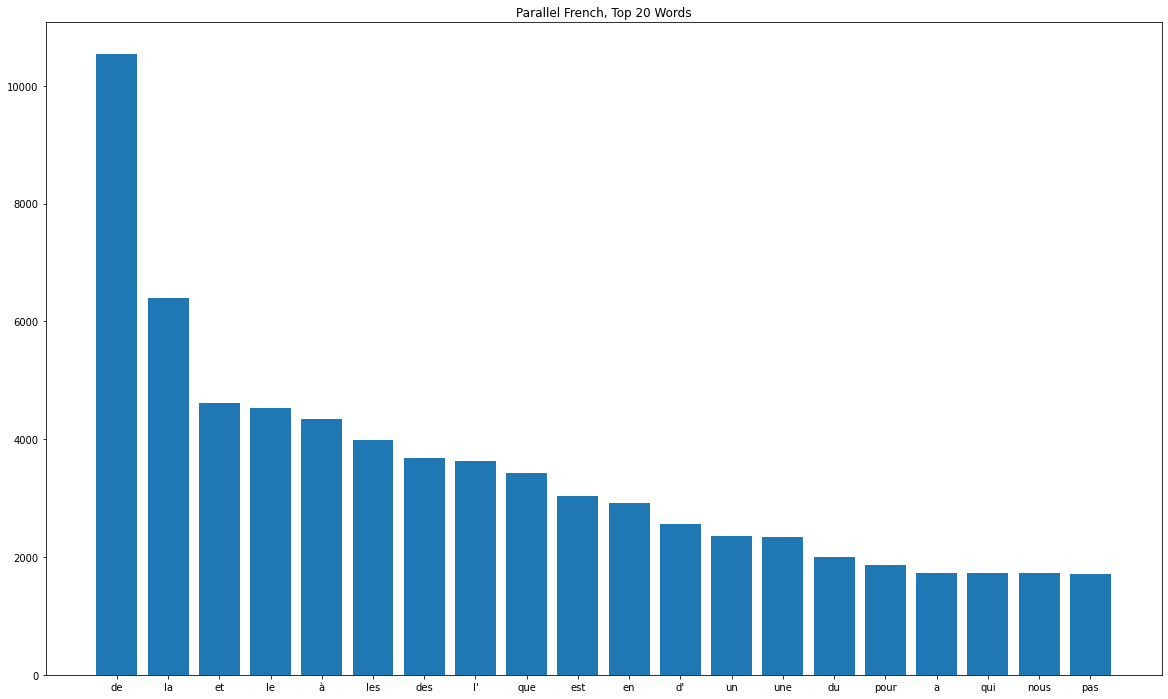

In [75]:
plt.figure(figsize=[20,12])
plt.bar(top.keys(), top.values())
plt.title("Parallel French, Top 20 Words")
plt.show()

In [76]:
print(sl_set)

[array([22, 29,  6, ..., 12, 34, 30]), array([26, 39,  7, ...,  8, 15, 37]), array([11, 35,  8, ..., 11, 17, 17]), array([10, 32,  9, ..., 10, 13, 22])]


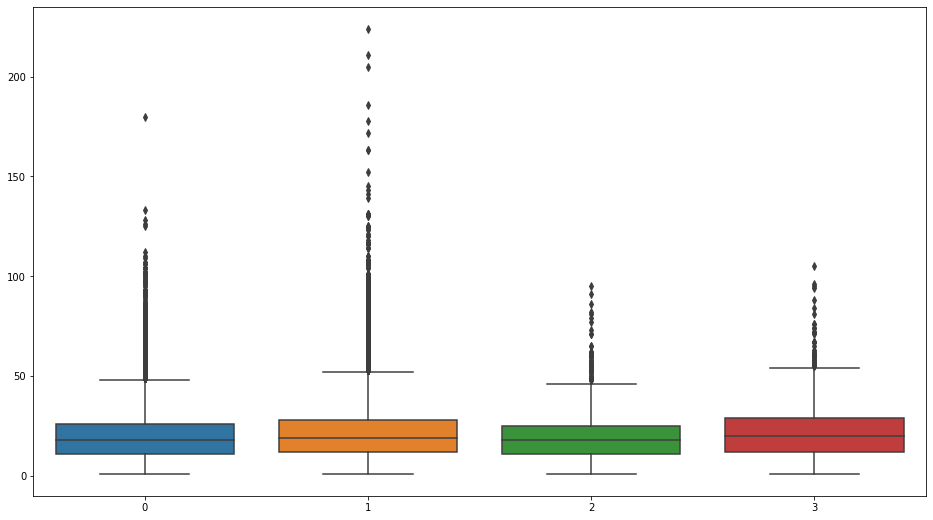

In [77]:
# Sentence Lengths
plt.figure(figsize=[16, 9])
sns.boxplot(data = sl_set)
plt.show()

In [82]:
print("OOV: \n Unaligned FR, Unaligned EN, Parallel FR, Parallel EN: ", OOV_count_set)
print("Vocab Size: \n Unaligned FR, Unaligned EN, Parallel FR, Parallel EN: ", vocab_count_set)

OOV: 
 Unaligned FR, Unaligned EN, Parallel FR, Parallel EN:  [2715, 2545, 341, 327]
Vocab Size: 
 Unaligned FR, Unaligned EN, Parallel FR, Parallel EN:  [57293, 80769, 13316, 17895]


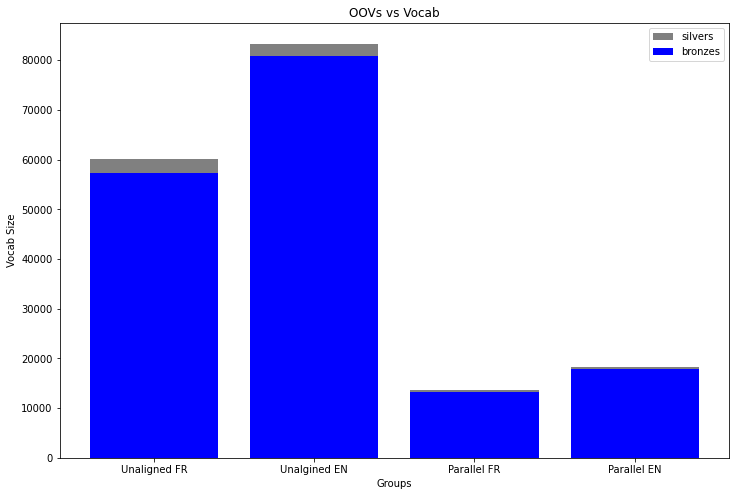

In [79]:
# OOVs in relation to real vocab
groups = ['Unaligned FR', 'Unalgined EN', 'Parallel FR', 'Parallel EN']
oovs = np.asarray(OOV_count_set)
reals = np.asarray(vocab_count_set)
ind = [x for x, _ in enumerate(groups)]

plt.figure(figsize=[12, 8])

plt.bar(ind, oovs, width=0.8, label='silvers', color='grey', bottom=reals)
plt.bar(ind, reals, width=0.8, label='bronzes', color='blue')

plt.xticks(ind, groups)
plt.ylabel("Vocab Size")
plt.xlabel("Groups")
plt.legend(loc="upper right")
plt.title("OOVs vs Vocab")

plt.show()